Paulo Black Udacity P1: Stroop Effect Stat Analysis
Started 3/22/2015


Sources:
Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/
Plotting documentation: https://plot.ly/matplotlib/histograms/


<b>Question 1: What is our independent variable? What is dependent?</b>

Answer: The independent variable is the actual congruency of the color and the word, the dependent variable is the time taken for the participant to read the list saying the colors of each word.

<b>Question 2: What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.</b>

Answer: Take mu_c as the mean of the population reading congruent words and mu_ic as mean of the population reading incongruent words. We can state the Null Hypothesis (mu_ic = mu_c) and the Alternative Hypothesis (mu_ic != mu_c). From a glance at the data it's reasonable to further argue that the Alternative Hypothesis will be mu_ic > mu_c. 


We'll use a Repeated Measure dependent variable one-tail T-test to find out more. I chose this because there was no variation in the testing order, all subjects performed the congruent test first and the incongruent on second.  Its resemblance to a normal distribution as well as the small size of the samples further supports our choise. The T-Test allows us to compare the means of the two and understand if the variation we introduced (in the dependent variable) created a significant change in the independent variable. It is sensible to calculate the T-value of the difference between each participants times by finding the mean of the difference values, the standard deviation of those values, and using the formula for T and the number of participants (24).

We can then compare the T-Value to the different T-Criticals associated with different alphas and see if our difference is statistically significant. The one tail designation comes from the assumption that the incongruent times will almost always be longer than the congruent times, so if there is any significant difference it will be on one end of the distribution and not both. 

<b>Question 3: Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.</b>



In [2]:
#Pandas handles this for us

#importing pandas and csv file
import pandas as pd
path = r'~/Desktop/iPython/P1_Stroop/stroopdata.csv'
dataFrame = pd.read_csv(path)
dataSort = pd.read_csv(r'~/Desktop/iPython/P1_Stroop/stroopdata_sort.csv')
print 'This is a list of the data:','\n',dataFrame,'\n'


#Congruent statistics
congstats = dataFrame['Congruent'].describe()
incongstats = dataFrame['Incongruent'].describe()
diffstats = dataFrame['Diff'].describe()
print 'Congruent Statistics: '
print 'The Mean is:',congstats[1]
print 'Total Count is:',congstats[0], 'Max Value is:', congstats[6]
print 'The Minimum Value is:', congstats[2],'The Range is:', congstats[6] - congstats[2]
print 'Std. Deviation is:',congstats[2]
print 'Variance is:', dataFrame['Congruent'].var(),'\n'

#Incongruent stats
print 'Incongruent Statistics:'
print 'The Mean is', incongstats[1]
print 'Total Count is:',incongstats[0], 'Max Value is:', incongstats[6]
print 'The Minimum Value is:', incongstats[2],'The Range is:', incongstats[6] - incongstats[2]
print 'Std. Deviation is:',incongstats[2] 
print 'Variance is:', dataFrame['Incongruent'].var(),'\n'

#Difference stats
print 'Difference Statistics:'
print 'The Mean is', diffstats[1]
print 'Total Count is:',diffstats[0], 'Max Value is:', diffstats[6]
print 'The Minimum Value is:', diffstats[2],'The Range is:', diffstats[6] - diffstats[2]
print 'Std. Deviation is:',diffstats[2] 
print 'Variance is:', dataFrame['Diff'].var(),'\n'

This is a list of the data: 
    Congruent  Incongruent    Diff
0      12.079       19.278  -7.199
1      16.791       18.741  -1.950
2       9.564       21.214 -11.650
3       8.630       15.687  -7.057
4      14.669       22.803  -8.134
5      12.238       20.878  -8.640
6      14.692       24.572  -9.880
7       8.987       17.394  -8.407
8       9.401       20.762 -11.361
9      14.480       26.282 -11.802
10     22.328       24.524  -2.196
11     15.298       18.644  -3.346
12     15.073       17.510  -2.437
13     16.929       20.330  -3.401
14     18.200       35.255 -17.055
15     12.130       22.158 -10.028
16     18.495       25.139  -6.644
17     10.639       20.429  -9.790
18     11.344       17.425  -6.081
19     12.369       34.288 -21.919
20     12.944       23.894 -10.950
21     14.233       17.960  -3.727
22     19.710       22.058  -2.348
23     16.004       21.157  -5.153 

Congruent Statistics: 
The Mean is: 14.051125
Total Count is: 24.0 Max Value is: 16.20075
The 

Answer: 

Naively and with little interpretation we clearly see the means and medians of the two datasets are quite different, supported by the large mean of the difference. We also see that in IC the range is much larger, as is the variance, which tells us that the participants perform with much less predictable capacity in the IC test than they do in the C one. We'll learn even more once we calculate T.

<b>Question 4: Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.</b>

Discussion below!

Populating the interactive namespace from numpy and matplotlib


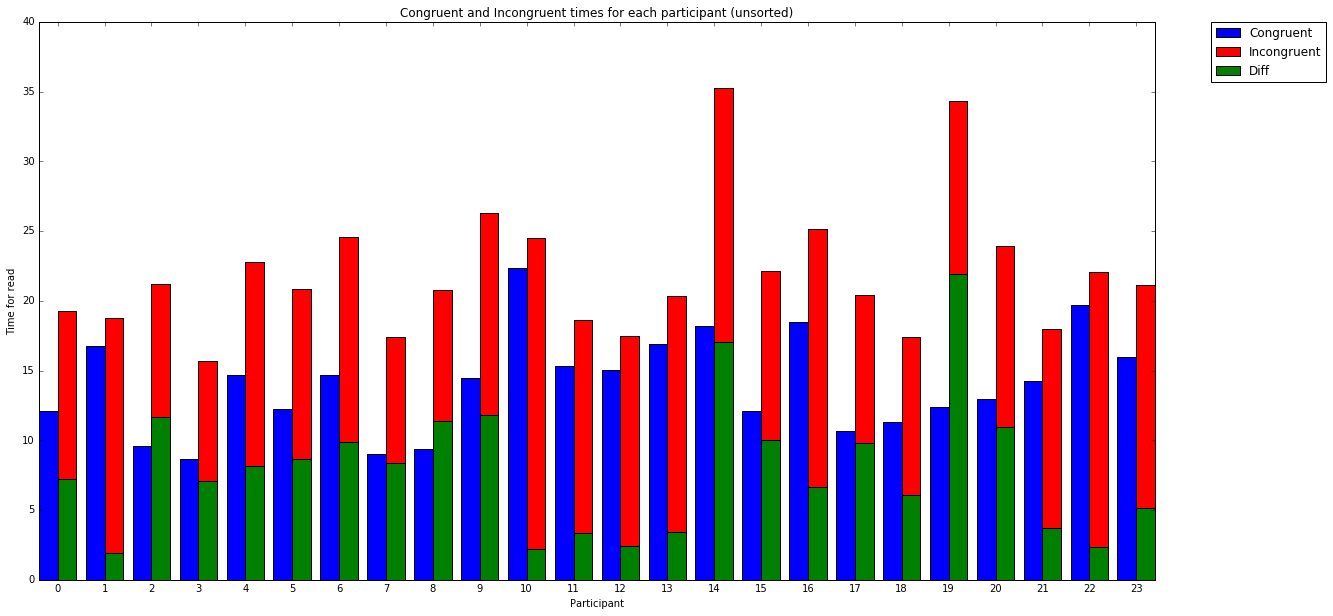

In [74]:
#Begin plotting some different visualizations
%pylab inline
import matplotlib.pyplot as plt
import numpy as np


#Plot all trials as adjacent bars
#Define bar positions and widths
#UNSORTED
x = np.arange(len(dataFrame['Congruent']))
width = .4

#Plot
plt.figure(1,figsize=(20,10))
plt.xticks(x+.2,x)
plt.bar(x-.2,dataFrame['Congruent'],width,color='b',label = 'Congruent')
plt.bar(x+.2,dataFrame['Incongruent'],width,color='r',label = 'Incongruent')
plt.bar(x+.2,-dataFrame['Diff'],width,color='g',label = 'Diff')
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Participant')
plt.ylabel('Time for read')
plt.title('Congruent and Incongruent times for each participant (unsorted)')

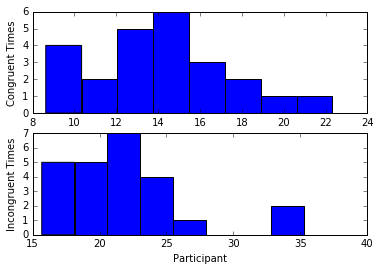

In [95]:
#Plotting the two data sets sorted into their distributions
plt.figure(2)
#Congruent distribution
plt.subplot(211)
bins = 8
plt.hist(dataSort['Congruent'],bins)
plt.xlabel('Participant')
plt.ylabel('Congruent Times')

#Incongruent distribution
plt.subplot(212)
plt.hist(dataSort['Incongruent'],bins)
plt.xlabel('Participant')
plt.ylabel('Incongruent Times')



<Container object of 3 artists>

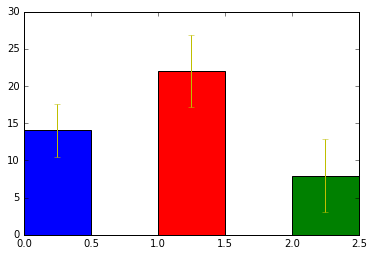

In [85]:
#Plot means and std dev. Sorry for some ugly colors.
plt.figure(4)
means = (congstats[1], incongstats[1],-diffstats[1])
stds = (congstats[2], incongstats[2],diffstats[2])
N = np.arange(len(means))
plt.bar(N,means,.5,color=['b','r','g'],yerr=stds,ecolor = 'y')


This is a bit messy but hopefully it sheds some light. The first plot gives us a bar chart showing each participant's values for C, IC and the difference (blue,red,green respectively). 

The second generates a histogram of the two data columns sorted. They look Gaussian-ish and justify treatment as a Normal Distribution. We can also note the huge outlier around 35 seconds in the incongruent histogram.

The third uses pandas to generate a bar for the mean of each set including error bars. This doesn't tell us much without interpretation but I thought I'd include it for kicks.

<b> Question 5: Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations? </b>

Answer: We can quickly calculate our t value for the study using t = (M_c - M_ic)/(S/sqrt(n). This is also effectively M_diff/(S/sqrt(n). From above, our M_diff = -7.96479166667, S = 4.86482691036, and n = 24.

Thus T = -8.020706944.
Cohen's D (M_d/S_d) = -1.637219949
Correlation Measure r^2 = (t^2/(t^2+df), r = 0.858275257

Now we can look at our t-table (https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)

We see that for Df = 23 like in our case, a T-Value of -8.02 is absolutely mammoth and tells us we obliterated the Null Hypothesis. The closest T-Critical is 3.768 (or -3.768) with a p-value of .0005 and a confidence level above 99.99%. Confidence interval = M_diff ± t_critical*S/(sqrt(n) so ours is from -4.14 to -11.87 (of course, understanding our negative values correspond to positive times we know that with 99.99%+ precision, the average extra time it takes a participant to perform an incongruent test vs. congruent is between 4.14 and 11.87 seconds

Formally:

1) Descriptive Statistics (as above)


Congruent Statistics: 
The Mean is: 14.051125
Total Count is: 24.0 Max Value is: 16.20075
The Minimum Value is: 3.55935795765 The Range is: 12.6413920424
Std. Deviation is: 3.55935795765
Variance is: 12.6690290707 

Incongruent Statistics:
The Mean is 22.0159166667
Total Count is: 24.0 Max Value is: 24.0515
The Minimum Value is: 4.79705712247 The Range is: 19.2544428775
Std. Deviation is: 4.79705712247
Variance is: 23.0117570362 

Difference Statistics:
The Mean is -7.96479166667 
Total Count is: 24.0 Max Value is: -3.6455
The Minimum Value is: 4.86482691036 The Range is: -8.51032691036
Std. Deviation is: 4.86482691036
Variance is: 23.6665408678 

2) Inferential statistics.
Conducted a two sample one-tailed T-test, obtained a T-Value of -8.020706944 with 23 degrees of freedom with a p-value of less than .0005.
t(23) = -8.02, left tail 
p < .0005

3) Effect Size Measures
Confidence interval on the mean difference: >99.99%(-4.14, -11.87)
d = 1.64
r^2 = .74

It's a little wacky because I did IC - C but obviously the result is just the absolute value. The results did match up with my initial expectations. Null hypothesis is right out, high confidence level with an ultra-low critical statistical value. Obviously it takes longer to read words when you're being Stroop'd.

<b>Question 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!</b>

Answer: I actually took some linguistics courses in college! The origin of the Stroop effect is still controversial, but as wikipedia is happy to inform us, the current explanations generally describe it as a result of interference in the reaction time of a task. You could do it the other way around too I bet, it would be interesting to know what the differences are between this test and one where the participant has to read the word itself and ignore the color.